In [8]:
library(ggplot2)
library(tidyverse)
library(ggpubr)
library(reshape2)

In [9]:
data <- read_csv('../results/benchmark.csv')

Rows: 1240 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): dataset, method
dbl (6): cells, seed, celltype_score, global_score, region_score, run_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [10]:
data <- data[data$global_score > 0,]
data <- data[data$cells == 0,]
data <- data[data$method != 'PCA', ]
data[nrow(data) + 1,]=list("stereo_mouse_embryo",0,0,'PASTE',NA,NA,NA,NA)
data <- data %>% 
  mutate(across('dataset', str_replace, 'merfish_mouse_hypothalamic', 'MERFISH')) %>%
  mutate(across('dataset', str_replace, 'visium_human_DLPFC', 'Visium')) %>%
  mutate(across('dataset', str_replace, 'stereo_mouse_embryo', 'Stereo-seq'))
data$dataset <- factor(data$dataset, levels = c('Visium','MERFISH','Stereo-seq'))
data$method <- factor(data$method, levels = c('SLAT','Harmony','Seurat','PASTE','SLAT_harmony'))
data %>% head()

dataset,cells,seed,method,celltype_score,global_score,region_score,run_time
<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
MERFISH,0,0,Harmony,0.8140986,0.270118528,0.3201809,9.439880
MERFISH,0,0,PASTE,0.0165315,0.001559576,0.0977854,38.626590
MERFISH,0,0,SLAT,0.6706176,0.437149095,0.6425452,12.214909
MERFISH,0,0,Seurat,0.7645041,0.237523394,0.3013100,109.805000
MERFISH,0,1,Harmony,0.8140986,0.270118528,0.3201809,8.878958
MERFISH,0,1,PASTE,0.0165315,0.001559576,0.0977854,34.688245


Warning message:
“Removed 1 rows containing missing values (geom_point).”


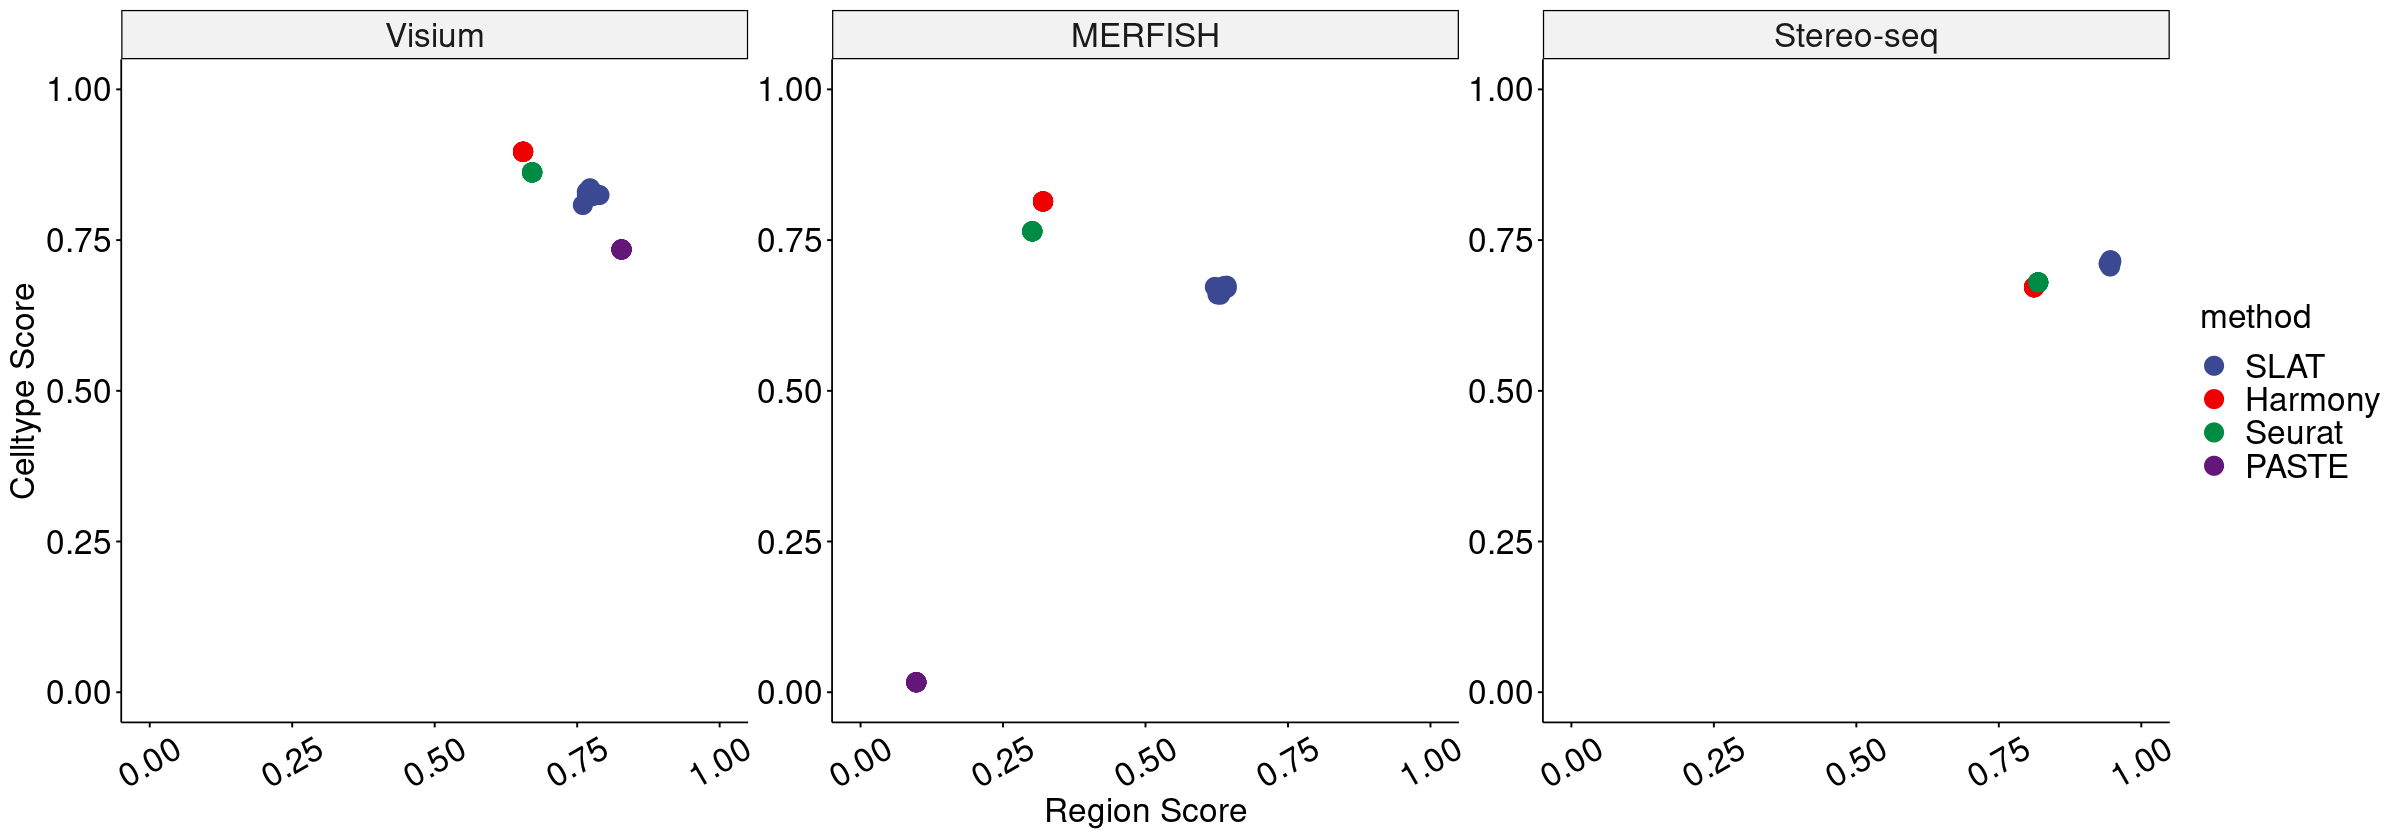

In [11]:
options(repr.plot.width=20, repr.plot.height=7)
ggscatter(data, x="region_score", y="celltype_score", color='method', size=5,
        palette='aaas', xlab='Region Score' ,ylab='Celltype Score', lab.size=30) %>% 
ggpar(xlim=c(0,1), ylim=c(0,1), legend='right', font.legend=20, font.subtitle=20, font.xtickslab=20, font.ytickslab=20, font.x=20, font.y=20) + 
facet_wrap(~dataset, scales="free") +
theme(axis.text.x=element_text(angle=30, vjust=0.5, hjust=0.5), strip.text.x=element_text(size=20))


Warning message in base::min(x, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in base::max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“NaNs produced”
Warning message:
“Removed 1 rows containing non-finite values (stat_summary).”
Warning message:
“Removed 1 rows containing non-finite values (stat_summary).”
Warning message:
“Removed 1 rows containing missing values (position_stack).”


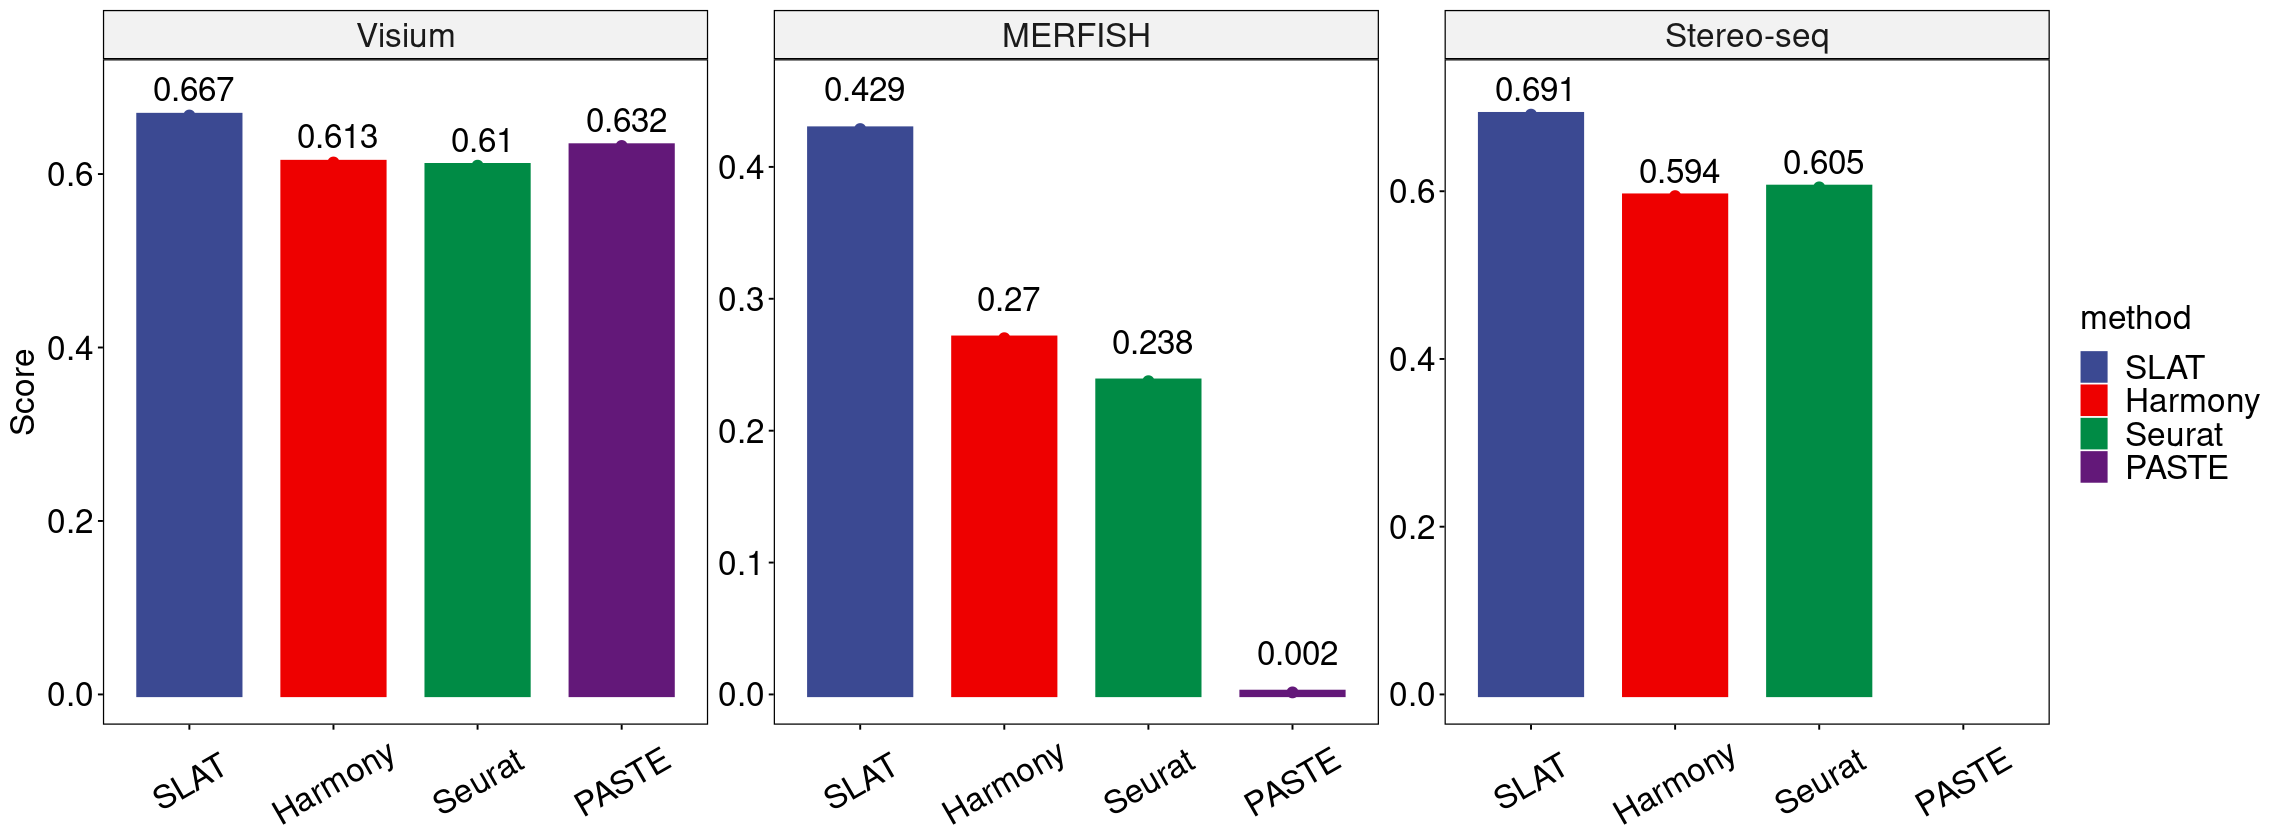

In [12]:
options(repr.plot.width=19, repr.plot.height=7)
ggbarplot(data, x="method", y="global_score", fill='method', color='method', add="mean_se", error.plot="pointrange",
        palette='aaas', xlab=F ,ylab='Score', size=1.5, lab.size=5, facet.by='dataset',label = F, label.pos = "out") %>% 
ggpar(legend='right', font.legend=20, font.subtitle=20, font.xtickslab=20, font.ytickslab=20, font.y=20) +
stat_summary(fun.data = function(x) data.frame(y = mean(x)+0.03, label = paste("", round(mean(x), 3))), geom="text",size=7) +
facet_wrap(~dataset, scales="free")+
theme(axis.text.x=element_text(angle=30, vjust=0.5, hjust=0.5), strip.text.x=element_text(size=20))